FOUNDATION OF DATA SCIENCE 

HOUSE RENTAL PREDICTION

MYTHILI G  22MID0301
HEMASREE R 22MID0303

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("houserent.csv")
df.head()


,Size_in_sqft,Bedrooms,Bathrooms,Floors,Age_of_house_years,Distance_to_city_center_km,Parking_spaces,Furnishing_status,Has_lift,Rent
0,1360,4,3,1,27,2.9,1,Semi-Furnished,1,23707
1,1794,5,3,2,24,0.7,2,Semi-Furnished,1,29976
2,1630,1,1,2,29,6.6,2,Furnished,1,31776
3,1595,4,1,2,7,6.2,0,Unfurnished,1,38080
4,2138,2,3,2,20,4.8,2,Unfurnished,0,9306


In [4]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("\nSummary statistics:\n")
print(df.describe())


Shape: (20, 10)
Missing values:
 Size_in_sqft                  0
Bedrooms                      0
Bathrooms                     0
Floors                        0
Age_of_house_years            0
Distance_to_city_center_km    0
Parking_spaces                0
Furnishing_status             0
Has_lift                      0
Rent                          0
dtype: int64

Summary statistics:

       Size_in_sqft   Bedrooms  Bathrooms     Floors  Age_of_house_years  \
count     20.000000  20.000000  20.000000  20.000000           20.000000   
mean    1987.350000   3.150000   2.050000   2.100000           20.000000   
std      800.068765   1.386969   0.825578   0.552506            7.085939   
min      630.000000   1.000000   1.000000   1.000000            7.000000   
25%     1536.250000   2.000000   1.000000   2.000000           14.000000   
50%     1888.000000   3.500000   2.000000   2.000000           21.500000   
75%     2643.500000   4.000000   3.000000   2.000000           27.000000   
max 

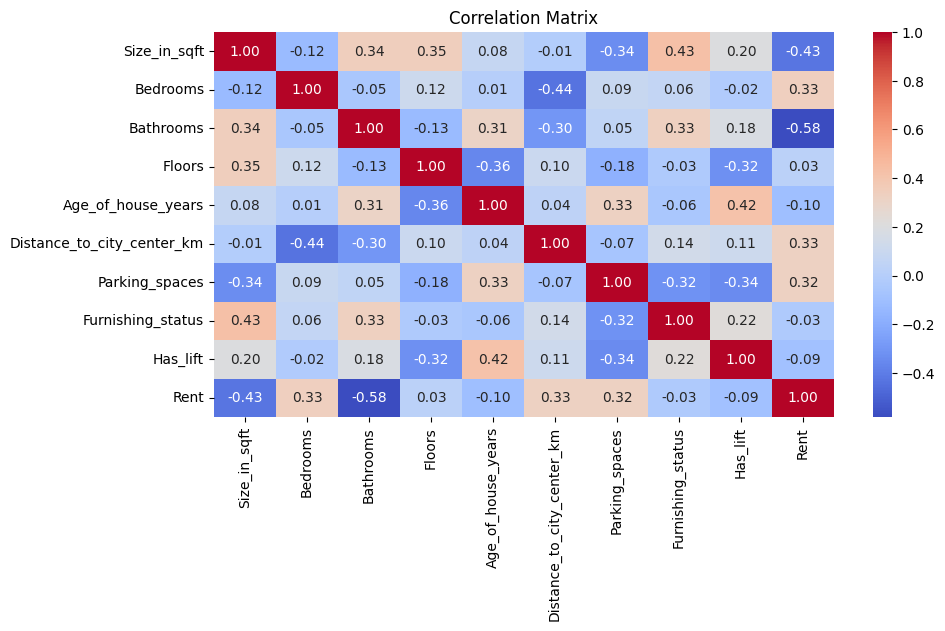

In [13]:
df_corr = df.copy()
df_corr['Furnishing_status'] = df_corr['Furnishing_status'].astype('category').cat.codes

plt.figure(figsize=(10, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [6]:
df_encoded = pd.get_dummies(df, columns=['Furnishing_status'], drop_first=True)
df_encoded.head()


,Size_in_sqft,Bedrooms,Bathrooms,Floors,Age_of_house_years,Distance_to_city_center_km,Parking_spaces,Has_lift,Rent,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished
0,1360,4,3,1,27,2.9,1,1,23707,True,False
1,1794,5,3,2,24,0.7,2,1,29976,True,False
2,1630,1,1,2,29,6.6,2,1,31776,False,False
3,1595,4,1,2,7,6.2,0,1,38080,False,True
4,2138,2,3,2,20,4.8,2,0,9306,False,True


In [7]:
X = df_encoded.drop('Rent', axis=1)
y = df_encoded['Rent']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:\n", pd.Series(model.coef_, index=X.columns))


Intercept: 17284.801618508565
Coefficients:
 Size_in_sqft                          -2.145608
Bedrooms                            1927.799743
Bathrooms                          -8416.552012
Floors                              2385.908965
Age_of_house_years                  -507.202233
Distance_to_city_center_km          1059.311275
Parking_spaces                      8795.803143
Has_lift                            7781.734712
Furnishing_status_Semi-Furnished   -4009.796621
Furnishing_status_Unfurnished       7101.382472
dtype: float64


In [10]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison)


Mean Squared Error: 206040191.17642173
R2 Score: -2.2049914565360846
   Actual     Predicted
0   23707   1159.510153
1   15994  15556.922618
2    8663  12006.781622
3   29976  12528.949988


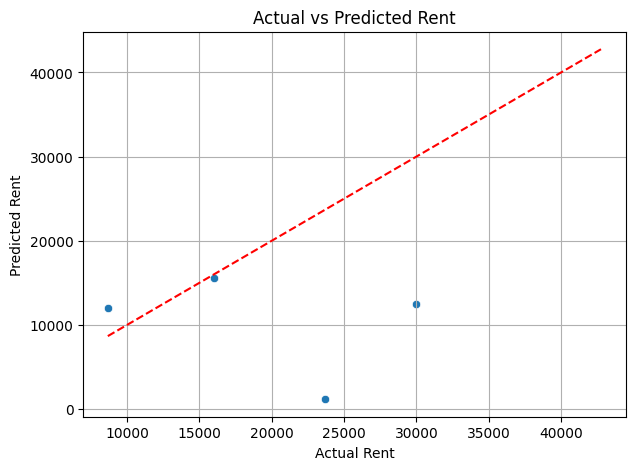

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.grid(True)
plt.show()


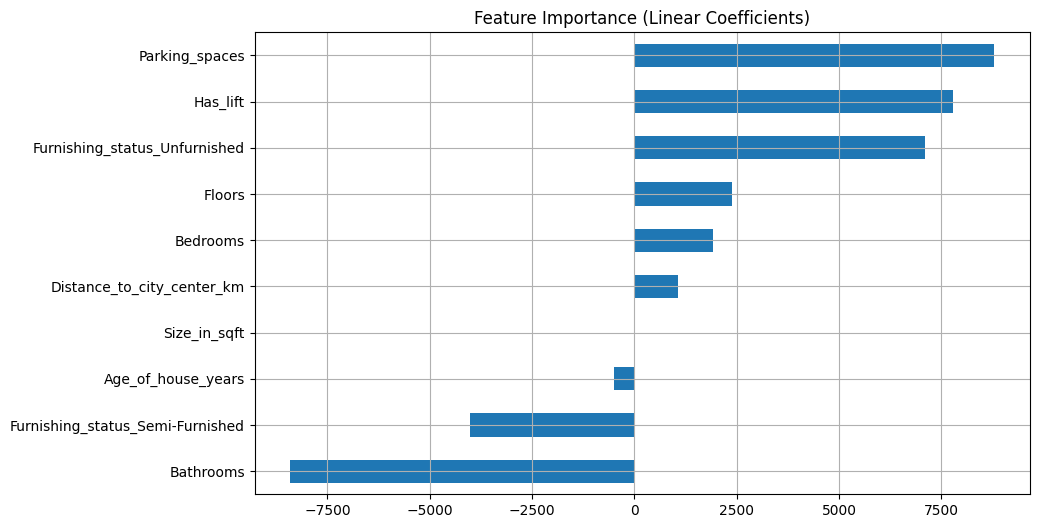

In [12]:
coef_df = pd.Series(model.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coef_df.plot(kind='barh')
plt.title("Feature Importance (Linear Coefficients)")
plt.grid(True)
plt.show()
